In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf

In [22]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [23]:
# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [24]:
y_label_size = np.unique(y_train).size

#### Each row represents an grayscale image containing 784 pixels and each pixel having values in range from 0-255  
#### The column label is a discrete value in the range 0 to 9 each value representing a specific category

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

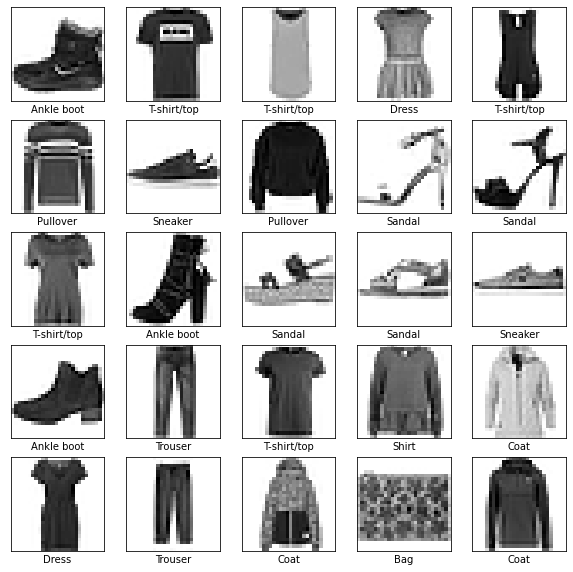

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [27]:
# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=y_label_size)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=y_label_size)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [29]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [30]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [31]:
# Train the model
model.fit(x_train,y_train,epochs=5,batch_size=1200,validation_data=(x_test,y_test))

Epoch 1/5


2023-05-24 10:53:12.424108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 1.0584 - accuracy: 0.6482

2023-05-24 10:53:17.848041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 6s 112ms/step - loss: 1.0584 - accuracy: 0.6482 - val_loss: 0.6459 - val_accuracy: 0.7614
Epoch 2/5
50/50 [==============================] - 5s 107ms/step - loss: 0.5642 - accuracy: 0.7906 - val_loss: 0.5202 - val_accuracy: 0.8128
Epoch 3/5
50/50 [==============================] - 5s 99ms/step - loss: 0.4797 - accuracy: 0.8282 - val_loss: 0.4675 - val_accuracy: 0.8327
Epoch 4/5
50/50 [==============================] - 5s 99ms/step - loss: 0.4336 - accuracy: 0.8476 - val_loss: 0.4425 - val_accuracy: 0.8408
Epoch 5/5
50/50 [==============================] - 5s 99ms/step - loss: 0.4034 - accuracy: 0.8575 - val_loss: 0.4224 - val_accuracy: 0.8507


In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.4224 - accuracy: 0.8507
Test Loss: 0.42239999771118164
Test Accuracy: 0.8507000207901001


In [33]:
# Choose random images from the test dataset
num_images = 10
random_indices = np.random.choice(range(len(x_test)), num_images)
random_indices

array([4126, 3746, 4719, 9698, 6231, 7780, 9972, 1118, 1894, 6971])

In [34]:
predictions = model.predict(x_test[random_indices])
predicted_classes = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 74ms/step


2023-05-24 10:53:41.511628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [35]:
predicted_classes

array([1, 7, 4, 0, 0, 5, 0, 1, 9, 4])

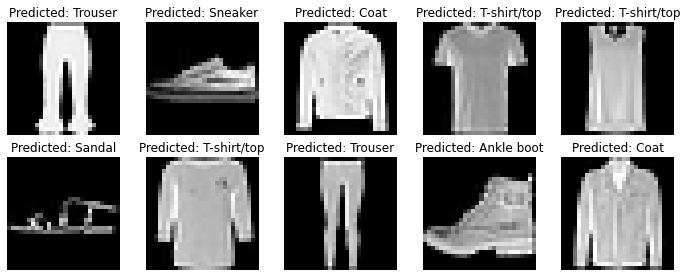

In [36]:
# Plot the images with their predicted classes
plt.figure(figsize=(12, 12))
for i, idx in enumerate(random_indices):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}")
    plt.axis('off')

plt.show()

In [37]:
y_probas = model.predict(x_test)
y_pred = y_probas.argmax(axis=-1)
y_test_org = np.argmax(y_test,axis=1)

313/313 [==============================] - 1s 3ms/step


In [38]:
from sklearn.metrics import classification_report
num_classes = 10
tar_names = [class_names[i] for i in range(num_classes)]
cr = classification_report(y_test_org, y_pred, target_names=tar_names)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.70      0.91      0.80      1000
     Trouser       0.98      0.97      0.97      1000
    Pullover       0.75      0.77      0.76      1000
       Dress       0.89      0.85      0.87      1000
        Coat       0.72      0.81      0.76      1000
      Sandal       0.96      0.94      0.95      1000
       Shirt       0.70      0.41      0.52      1000
     Sneaker       0.89      0.95      0.92      1000
         Bag       0.94      0.96      0.95      1000
  Ankle boot       0.96      0.92      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [39]:
# conv_layer = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides,
#                     padding=padding, activation=activation)

# filters: The number of filters (or output channels) in the convolutional layer. This determines the depth or number of feature maps produced by the layer.
# kernel_size: The size of the convolutional kernel or filter. It can be specified as a single integer or as a tuple of two integers indicating the height and width of the kernel.
# strides: The stride size for the convolution operation. It can be specified as a single integer or as a tuple of two integers indicating the stride in the height and width directions.
# padding: The padding mode to be used. It can be set to 'valid' or 'same'. 'valid' means no padding, and 'same' means padding will be added to ensure the output has the same spatial dimensions as the input.
# activation: The activation function applied to the output of the convolutional layer.

### Preprocess Data  
Convert each image of 784 into (28x28x1)(height x width x color_channels). Divide values by 255 to scale the values.

In [19]:
x_train = train_df.iloc[:,1:].to_numpy()
x_train = x_train.reshape([-1,28,28,1])
x_train = x_train / 255

NameError: name 'train_df' is not defined

In [ ]:
y_train = train_df.iloc[:,0].to_numpy()

In [ ]:
x_test = test_df.iloc[:,1:].to_numpy()
x_test = x_test.reshape([-1,28,28,1])
x_test = x_test / 255

In [ ]:
y_test = test_df.iloc[:,0].to_numpy()

In [ ]:
# Sure! Let's explain each of these layers commonly used in convolutional neural networks (CNNs):

# 1. Conv2D Layer:
# The Conv2D layer is a fundamental building block in CNNs for image processing. It performs convolutional operations on the input data. Convolution involves sliding a small filter/kernel over the input image and computing dot products between the filter weights and the corresponding input values. This process helps in extracting local features such as edges, textures, and patterns from the image. The Conv2D layer typically consists of multiple filters that learn different features simultaneously.

# 2. Max Pooling Layer:
# The Max Pooling layer is used to downsample the spatial dimensions (width and height) of the input feature maps while retaining the most important features. It operates on small rectangular regions of the input and outputs the maximum value within each region. Max pooling helps in reducing the spatial resolution of the feature maps, making the network more robust to small variations in the input and reducing the number of parameters and computations.

# 3. Flatten Layer:
# The Flatten layer is used to convert the multi-dimensional feature maps into a one-dimensional vector. It collapses the spatial dimensions (width, height) into a single dimension while preserving the depth. This is typically applied after the convolutional and pooling layers, and it transforms the output volume into a format that can be used as input to fully connected layers. The Flatten layer ensures compatibility with dense layers that require a 1D input.

# To summarize, the Conv2D layer performs convolutions to extract local features, the Max Pooling layer downsamples the feature maps to retain important information, and the Flatten layer reshapes the feature maps into a 1D vector for further processing with fully connected layers. These layers are commonly used in CNN architectures for tasks such as image classification, object detection, and image segmentation.